<a href="https://colab.research.google.com/github/alpeshraj/playstore-app-analysis/blob/main/Alpesh_kumar_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


# **1. Import the Req Libs**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## **2. Mount Google Drive to access the Project Data**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **3. Getting data from CSV file using Pandas**


In [4]:
# dataframe from user review csv
df_play_store=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_science_cohort_shivalik/MODULE 1 PYTHON/EDA Capston_project/Play Store Data.csv')

df_user_review=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_science_cohort_shivalik/MODULE 1 PYTHON/EDA Capston_project/User Reviews.csv")
# data from play store data csv

# basic information of play store data for different apps
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **4. Check Data for missing values and duplicates and inconsistency**


In [5]:
df_play_store.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
# Check for duplicate rows 
duplicate_rows =df_play_store[df_play_store.duplicated()].count()
print(f'The total Duplicate rows are {duplicate_rows} ')

The total Duplicate rows are App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64 


## **5. Dropping Duplicated rows**

In [7]:
# Lets drop the duplicate rows
df_play_store= df_play_store[~df_play_store.duplicated()] 

In [8]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Previously it was 10841 entries, after removing duplicates 10358 entries**

In [10]:
df_play_store.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
list(df_play_store.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [12]:
df_play_store['App'].value_counts()

ROBLOX                            9
8 Ball Pool                       7
Zombie Catchers                   6
Bubble Shooter                    6
Helix Jump                        6
                                 ..
The Grand Bike V                  1
Fayr - Co-Parenting Simplified    1
BK Formula Calculator             1
CW Deposit                        1
Dresses Ideas & Fashions +3000    1
Name: App, Length: 9660, dtype: int64

In [13]:
# From the above value counts by app name we can see there are duplicate rows for a some applications.
# Now checking if those rows for same app is identical or not
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


### **So from the above observation we can see there might be duplicate rows present for same app in this data with Different no of reviews and different category. So grouping the apps by category and name (There might be same named app on different category)keeping the Highest no of review and discurding other rows.**

In [14]:
df_play_store = df_play_store.sort_values('Reviews', ascending=False).drop_duplicates(['App', 'Category'])

In [15]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 2989 to 5846
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [16]:
# checking if deuplicates are present or not
df_play_store['App'].value_counts()

Dog Run - Pet Dog Simulator                           2
busuu: Learn Languages - Spanish, English & More      2
Fallout Shelter                                       2
H TV                                                  2
My Talking Tom                                        2
                                                     ..
Transformers Rescue Bots: Hero Adventures             1
Where's My Water?                                     1
Disney Magic Kingdoms: Build Your Own Magical Park    1
Air conditioner remote control                        1
Antenna Tool                                          1
Name: App, Length: 9660, dtype: int64

In [17]:
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [18]:
# The total number of apps
print('Total number of apps in the file = ', df_play_store['App'].count())

Total number of apps in the file =  9745


### **6. Detecting outliers and Removing it**

In [19]:
# checking the data 
df_play_store.describe()

,Rating
count,8281.000000
mean,4.176790
std,0.558933
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


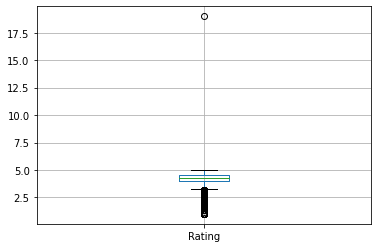

In [20]:
# Boxplot graph
df_play_store.boxplot()

## **There is clearly a Outlier (upper) as we know that rating cannot be greater than 5 in Playstore**

In [21]:
# where is rating more than 5
df_play_store[df_play_store['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
# removing the outlier
df_play_store.drop([10472],inplace=True)

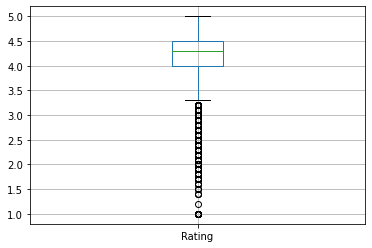

In [23]:
# boxplot check again
df_play_store.boxplot()

### **7. Now checking for null or blank values and replacing them with median.**

In [24]:
def inpute_median(series):
  return series.fillna(series.median())

In [25]:
df_play_store.Rating = df_play_store['Rating'].transform(inpute_median)

In [26]:
# get null values count column wise
df_play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### So there are null values present on Type Current Ver and Android Ver Column

In [27]:
# instead of removing that row with the null value we can replace it with Mode (most frequently appeared value for that column)
print(df_play_store['Type'].mode())

df_play_store['Type'].fillna(str(df_play_store['Type'].mode().values[0]),inplace=True)

0    Free
dtype: object


In [28]:
print(df_play_store['Current Ver'].mode())
df_play_store['Current Ver'].fillna(str(df_play_store['Current Ver'].mode().values[0]),inplace=True)

0    Varies with device
dtype: object


In [29]:
print(df_play_store['Android Ver'].mode())
df_play_store['Android Ver'].fillna(str(df_play_store['Android Ver'].mode().values[0]),inplace=True)

0    4.1 and up
dtype: object


In [30]:
# Checking for null values again
df_play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [31]:
df_play_store.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9190,EB Demo for Android,FAMILY,4.3,0,13M,10+,Free,0,Teen,Entertainment,"May 17, 2017",1.0,4.1 and up
2460,Drug Calculator,MEDICAL,4.3,0,4.6M,10+,Free,0,Everyone,Medical,"July 27, 2018",1.0,4.4 and up
2461,HACH Cares,MEDICAL,4.3,0,28M,10+,Free,0,Everyone,Medical,"July 25, 2018",300000.1.11,4.0.3 and up
2462,WAH 247,MEDICAL,4.3,0,29M,1+,Free,0,Everyone,Medical,"July 20, 2018",300000.1.11,4.0.3 and up
5846,YAKALA AY,GAME,4.3,0,14M,1+,Paid,$0.99,Everyone,Arcade,"July 7, 2018",1.0,4.1 and up


In [32]:
df_size_unique = df_play_store.Size.unique()
df_size_unique

array(['31M', '91k', '18M', '22M', '33M', 'Varies with device', '5.5M',
       '10M', '38M', '3.7M', '96M', '15M', '97M', '2.9M', '2.8M', '3.9M',
       '49M', '3.2M', '75M', '9.4M', '71M', '6.6M', '19M', '1.1M', '13M',
       '63M', '2.7M', '39M', '51M', '74M', '99M', '27M', '40M', '59M',
       '4.5M', '37M', '55M', '16M', '70M', '7.2M', '73k', '2.0M', '9.7M',
       '6.3M', '3.4M', '720k', '9.9M', '14M', '7.9M', '45M', '20M',
       '6.7M', '1.3M', '87M', '8.9M', '598k', '3.5M', '2.6M', '1.9M',
       '23M', '26M', '3.6M', '30M', '5.1M', '53M', '9.0M', '93k', '4.1M',
       '28M', '25M', '2.5M', '3.8M', '1.0M', '54M', '79M', '12M', '1.5M',
       '5.8M', '82M', '4.7M', '58M', '7.6M', '61M', '7.0M', '64M', '3.1M',
       '118k', '696k', '44M', '411k', '1.2M', '17M', '60M', '57M', '43M',
       '21M', '11M', '9.3M', '6.5M', '3.0M', '1.7M', '6.1M', '387k',
       '8.7M', '9.2M', '35M', '7.3M', '5.4M', '5.0M', '98M', '5.6M',
       '1.6M', '5.7M', '924k', '36M', '2.4M', '383k', '8.6M', 

**In Size column we can see that the size is not defined in single unit Both KB and MB are there. So we have to convert those to same unit (KB). Also There are columns with Varies with device string. Replacing that with Null.**

In [33]:
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(str(x).replace('M', '')) * 1024 if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
# converting all str values to float
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(x))

In [34]:
df_play_store.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1250
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [35]:
# Replace null values with Category Mean
df_play_store['Size'].fillna((df_play_store['Size'].mean()), inplace=True)

In [36]:
df_play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [37]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 2989 to 5846
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9744 non-null   object 
 1   Category        9744 non-null   object 
 2   Rating          9744 non-null   float64
 3   Reviews         9744 non-null   object 
 4   Size            9744 non-null   float64
 5   Installs        9744 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9744 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9744 non-null   object 
 10  Last Updated    9744 non-null   object 
 11  Current Ver     9744 non-null   object 
 12  Android Ver     9744 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


**Now we see that Review column is not numeric type . There must be some values with non numeric. So converting those to Numeric value.**

In [38]:
df_play_store['Reviews'] = pd.to_numeric(df_play_store['Reviews'])
df_play_store.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31744.000000,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91.000000,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18432.000000,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22528.000000,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33792.000000,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,21016.589534,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5632.000000,"1,000,000+",Free,0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10240.000000,"50,000+",Free,0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,21016.589534,"10,000,000+",Free,0,Everyone,Communication,"July 30, 2018",Varies with device,Varies with device
326,Buff Thun - Daily Free Webtoon / Comics / Web ...,COMICS,4.5,9952,38912.000000,"500,000+",Free,0,Everyone 10+,Comics,"July 31, 2018",4.3.0,4.1 and up


**Price column is not numeric value. So to do calculations we have to convert it to numerical value**

In [39]:
# replacing $ with blank using lambda function
df_play_store['Price'] = df_play_store['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
# converting string to float type value
df_play_store['Price'] = df_play_store['Price'].apply(lambda x: float(x))
df_play_store.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7249,Team CF,LIFESTYLE,4.3,0,3072.0,100+,Free,0.00,Everyone,Lifestyle,"June 7, 2018",3.9.9.2,2.3 and up
6328,BJ - Confidential,COMMUNICATION,4.3,0,3276.8,10+,Free,0.00,Teen,Communication,"April 23, 2018",1.7,4.1 and up
9180,Debra Care Conference,BUSINESS,4.3,0,30720.0,50+,Free,0.00,Everyone,Business,"June 15, 2018",5.29.02,5.0 and up
2453,Smartshading AI,MEDICAL,4.3,0,10240.0,10+,Free,0.00,Everyone,Medical,"June 21, 2018",1.0,4.1 and up
7255,Squeezy CF,MEDICAL,4.3,0,1433.6,10+,Paid,2.99,Everyone,Medical,"April 26, 2017",1.2.11,4.0 and up
9190,EB Demo for Android,FAMILY,4.3,0,13312.0,10+,Free,0.00,Teen,Entertainment,"May 17, 2017",1.0,4.1 and up
2460,Drug Calculator,MEDICAL,4.3,0,4710.4,10+,Free,0.00,Everyone,Medical,"July 27, 2018",1.0,4.4 and up
2461,HACH Cares,MEDICAL,4.3,0,28672.0,10+,Free,0.00,Everyone,Medical,"July 25, 2018",300000.1.11,4.0.3 and up
2462,WAH 247,MEDICAL,4.3,0,29696.0,1+,Free,0.00,Everyone,Medical,"July 20, 2018",300000.1.11,4.0.3 and up
5846,YAKALA AY,GAME,4.3,0,14336.0,1+,Paid,0.99,Everyone,Arcade,"July 7, 2018",1.0,4.1 and up


In [40]:
df_play_store.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31744.000000,"1,000,000+",Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91.000000,"100,000+",Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18432.000000,"1,000,000+",Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22528.000000,"500,000+",Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33792.000000,"1,000,000+",Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,21016.589534,"100,000+",Free,0.0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5632.000000,"1,000,000+",Free,0.0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10240.000000,"50,000+",Free,0.0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,21016.589534,"10,000,000+",Free,0.0,Everyone,Communication,"July 30, 2018",Varies with device,Varies with device
326,Buff Thun - Daily Free Webtoon / Comics / Web ...,COMICS,4.5,9952,38912.000000,"500,000+",Free,0.0,Everyone 10+,Comics,"July 31, 2018",4.3.0,4.1 and up


**Installs Column is also not numeric. So again we have to convert it to numeric value also**

In [41]:
# There are  + symbol present so replacing those with lambda function
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
# There are  , symbol present so replacing those with lambda function
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
# converting string to float type value
df_play_store['Installs'] = df_play_store['Installs'].apply(lambda x: float(x))

In [42]:
print(df_play_store.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [43]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 2989 to 5846
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9744 non-null   object 
 1   Category        9744 non-null   object 
 2   Rating          9744 non-null   float64
 3   Reviews         9744 non-null   int64  
 4   Size            9744 non-null   float64
 5   Installs        9744 non-null   float64
 6   Type            9744 non-null   object 
 7   Price           9744 non-null   float64
 8   Content Rating  9744 non-null   object 
 9   Genres          9744 non-null   object 
 10  Last Updated    9744 non-null   object 
 11  Current Ver     9744 non-null   object 
 12  Android Ver     9744 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


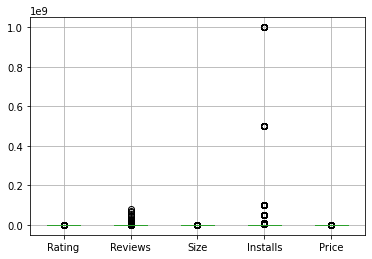

In [44]:
df_play_store.boxplot()

# **Analysing the Clean Data**

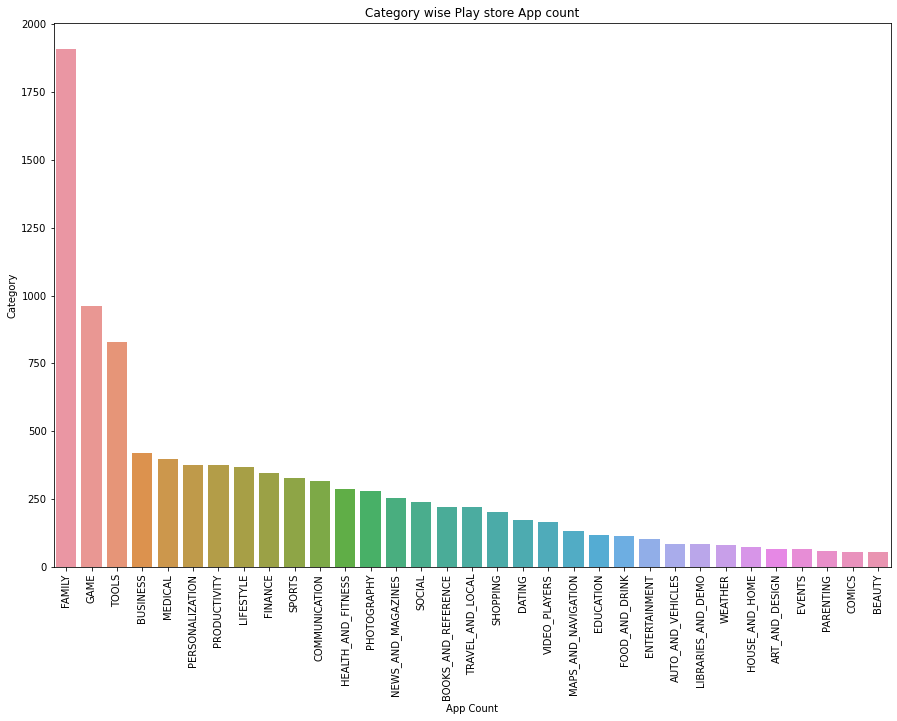

In [45]:
# Each Category wise app count
y = df_play_store['Category'].value_counts()
x = df_play_store['Category'].value_counts().index
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.xlabel("App Count")
plt.ylabel("Category")

graph = sns.barplot(x = x_axis, y = y_axis)
graph.set_title("Category wise Play store App count");

In [46]:
# Getting the category wise App count
df_play_store.groupby(['Category'])['App'].count().sort_values(ascending=False).reset_index()

,Category,App
0,FAMILY,1909
1,GAME,960
2,TOOLS,829
3,BUSINESS,420
4,MEDICAL,396
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,327


# Comparing Category And App Type (Fee, Paid) wise Number of Installs of Apps

In [47]:
category_type_wise_no_installs = df_play_store.groupby(['Category','Type'])[['Installs']].sum().reset_index()
category_type_wise_no_installs['log_base_ten_Installs'] = np.log10(category_type_wise_no_installs['Installs'])
category_type_wise_no_installs

,Category,Type,Installs,log_base_ten_Installs
0,ART_AND_DESIGN,Free,1.143221e+08,8.058130
1,ART_AND_DESIGN,Paid,1.600000e+04,4.204120
2,AUTO_AND_VEHICLES,Free,5.308006e+07,7.724931
3,AUTO_AND_VEHICLES,Paid,5.015000e+04,4.700271
4,BEAUTY,Free,2.719705e+07,7.434522
...,...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,1.830600e+05,5.262593
59,VIDEO_PLAYERS,Free,3.931832e+09,9.594595
60,VIDEO_PLAYERS,Paid,7.100000e+04,4.851258
61,WEATHER,Free,3.602885e+08,8.556650


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


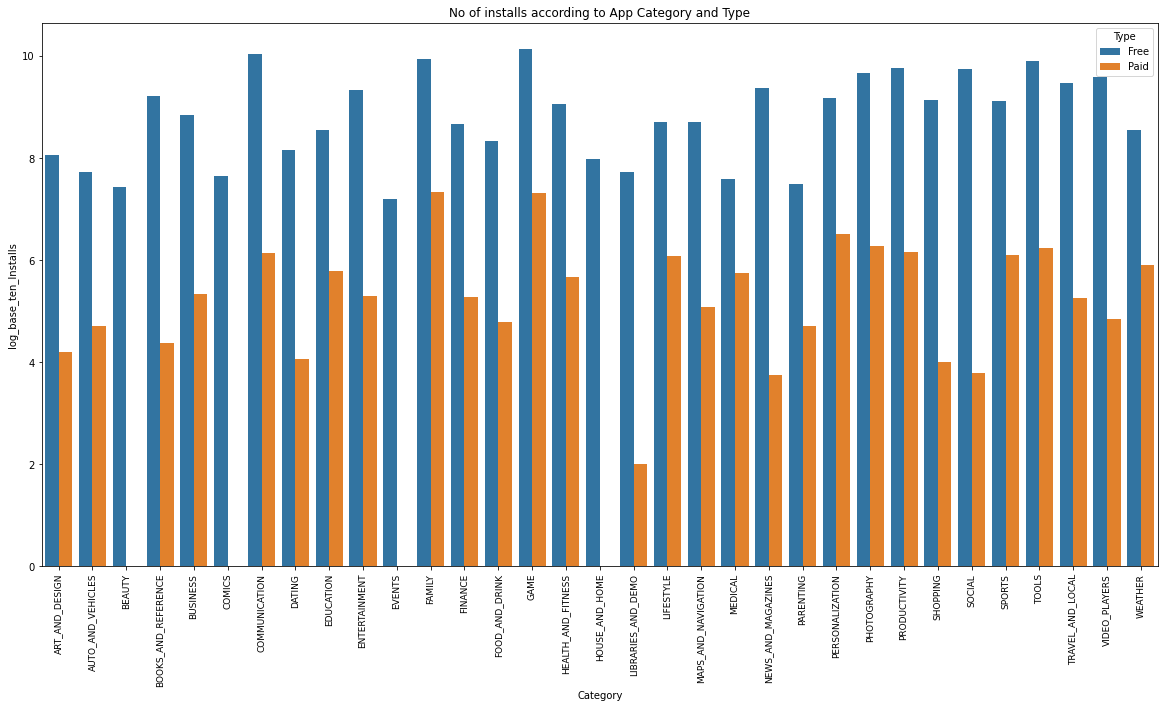

In [48]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=9)

plt.xlabel("App Category(Fee/Paid)")
plt.ylabel("Installation No.")
plt.title("No of installs according to App Category and Type")
sns.barplot('Category', 'log_base_ten_Installs', hue='Type', data=category_type_wise_no_installs);

plt.show()

# From this graph we can deduce that The Game category has the highest number of Installation. So the most used category.

# **App Category wise Pricing Visualization**

In [49]:
group_by_cat_pricing = df_play_store.groupby(['Category'])[['Price']].mean().reset_index()
group_by_cat_pricing

,Category,Price
0,ART_AND_DESIGN,0.093281
1,AUTO_AND_VEHICLES,0.158471
2,BEAUTY,0.000000
3,BOOKS_AND_REFERENCE,0.539505
4,BUSINESS,0.417357
5,COMICS,0.000000
6,COMMUNICATION,0.263101
7,DATING,0.160468
8,EDUCATION,0.150924
9,ENTERTAINMENT,0.078235


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


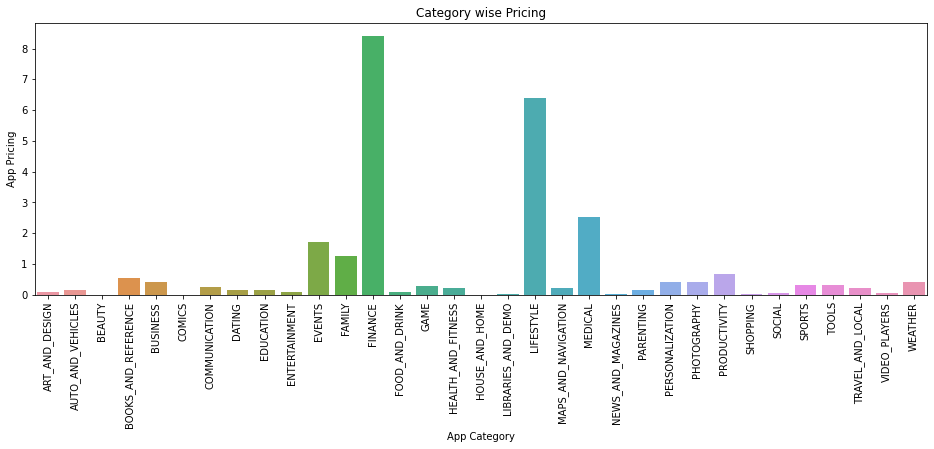

In [50]:
plt.figure(figsize=(16,5))
sns.barplot('Category', 'Price', data=group_by_cat_pricing);
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('App Category')
plt.ylabel('App Pricing')
plt.show()

## We can deduce from this graph that for Finance, Lifestyle and Medical category apps have more pricing

## App Category wise Rating visualization

In [51]:
cat_wise_group = df_play_store.groupby('Category')
cat_wise_rating_mean = cat_wise_group['Rating'].agg(np.mean)
print(cat_wise_rating_mean)

Category
ART_AND_DESIGN         4.354688
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154747
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.200471
FINANCE                4.138551
FOOD_AND_DRINK         4.191964
GAME                   4.249688
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.203788
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.238119
SOCIAL                 4.255230
SPORTS                 4.234862
TOOLS                  4.074427
TRAVEL_AND_LOCAL       4.103196

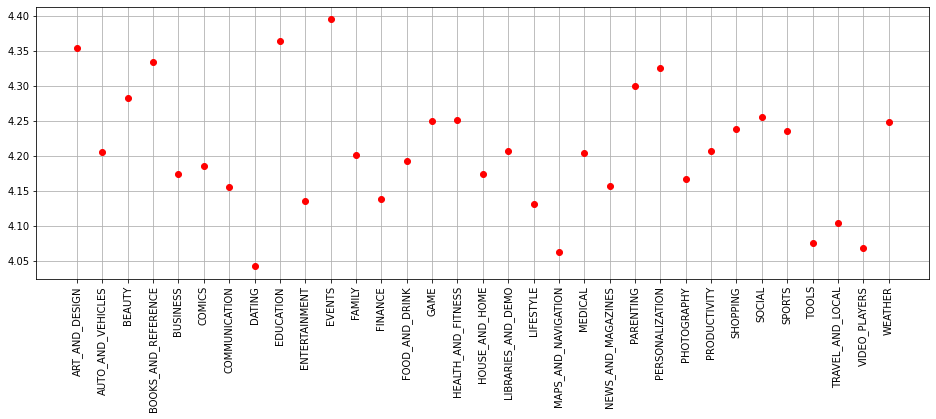

In [52]:
plt.figure(figsize=(16,5))
plt.plot(cat_wise_rating_mean, 'ro')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## We can deduce from this graph that Dating, Maps and Navigation, Tools, Travel & Local, Video Player category have the lowest Ratings from the user.

# **App Category wise Review Visualization**

In [53]:
cat_wise_group = df_play_store.groupby('Category')
cat_wise_review_mean = cat_wise_group['Reviews'].agg(np.mean)
print(cat_wise_review_mean)

Category
ART_AND_DESIGN          22175.296875
AUTO_AND_VEHICLES       13690.188235
BEAUTY                   7476.226415
BOOKS_AND_REFERENCE     75328.256757
BUSINESS                23550.054762
COMICS                  41828.553571
COMMUNICATION          904562.060127
DATING                  21192.391813
EDUCATION              112309.176471
ENTERTAINMENT          340816.284314
EVENTS                   2515.906250
FAMILY                 181255.158198
FINANCE                 36704.269565
FOOD_AND_DRINK          56482.714286
GAME                   649739.041667
HEALTH_AND_FITNESS      74186.527778
HOUSE_AND_HOME          26079.932432
LIBRARIES_AND_DEMO      10795.785714
LIFESTYLE               32066.915989
MAPS_AND_NAVIGATION    135337.007634
MEDICAL                  3240.073232
NEWS_AND_MAGAZINES      91065.677165
PARENTING               15972.183333
PERSONALIZATION        142401.906915
PHOTOGRAPHY            374919.448399
PRODUCTIVITY           148638.652406
SHOPPING               220564

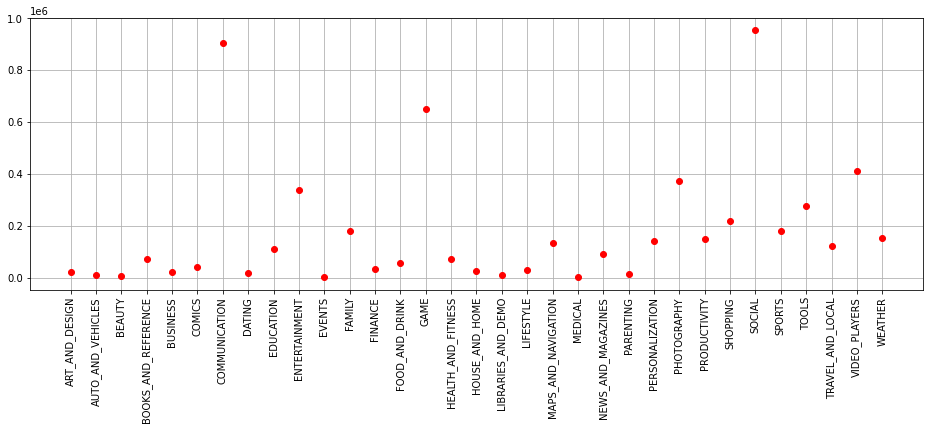

In [54]:
plt.figure(figsize=(16,5))
plt.plot(cat_wise_review_mean, 'ro')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## We can deduce from this graph that Communication, Game and Social category of Apps got most number of reviews

# Number of installed applications for every Category

In [55]:
applications_category_count = df_play_store.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [56]:
applications_category_installs = df_play_store.groupby(['Category'])[['Installs']].sum()

In [57]:
category_installs = pd.merge(applications_category_count, applications_category_installs, on='Category')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


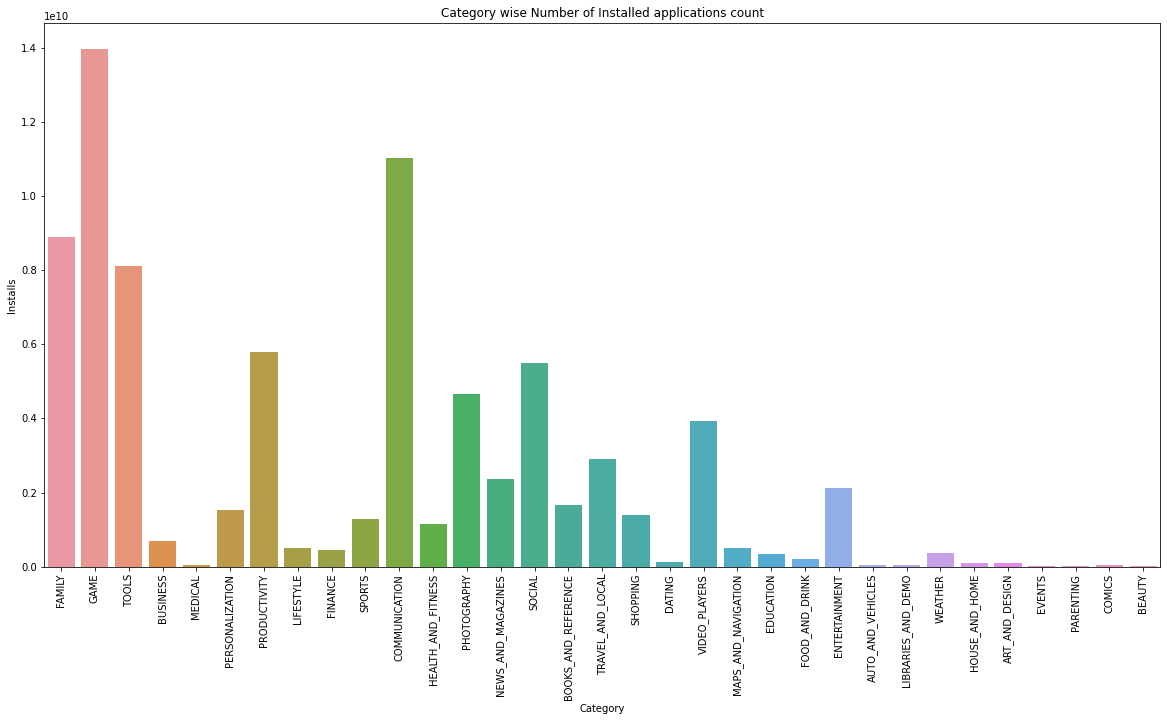

In [58]:
#  Number of installed application for each category.
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category wise Number of Installed applications count")
sns.barplot(category_installs.Category, category_installs.Installs)

## So we can see in the playstore Family, Games and Tools Category are not at the top. Games, Communication and Tools category have the maximum Number of apps installed.

# **Total No of Paid And Free apps**

In [59]:
df_play_store['Type'].value_counts()

Free    8986
Paid     758
Name: Type, dtype: int64

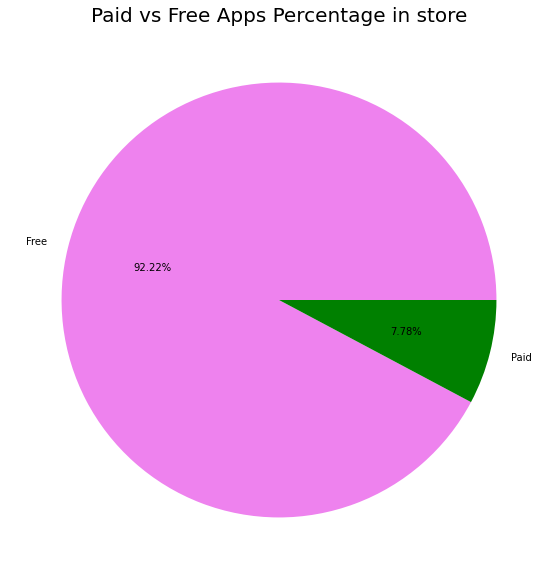

In [60]:
## No. of paid and free apps
plt.figure(figsize=(10,10))
type_labels =df_play_store['Type'].value_counts().index
types_sizes = df_play_store['Type'].value_counts(sort = True)
colors = ["violet","green"]
plt.pie(types_sizes,labels=type_labels, colors=colors,autopct="%.2f%%")
plt.title('Paid vs Free Apps Percentage in store',size = 20)
plt.show()

# **Distribution of the Ratings of all the Applications**

In [61]:
# remove null values from size column
df_play_store.loc[df_play_store['Size'].isnull(),'Size']=0
df_play_store = df_play_store.loc[df_play_store.groupby(['App'])['Reviews'].idxmax()]

In [62]:
# Setting parameter for plotting the graph
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [63]:
highest_genres = df_play_store.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [64]:
summed_genres_installs = df_play_store.groupby(['Genres'])[['Installs']].sum()

In [65]:
top_genres_installs = pd.merge(highest_genres, summed_genres_installs, on='Genres')
genres_ratings_means = df_play_store.groupby(['Genres'])[['Rating']].mean()
genre_wise_all_installs_ratings = pd.merge(top_genres_installs, genres_ratings_means, on='Genres')

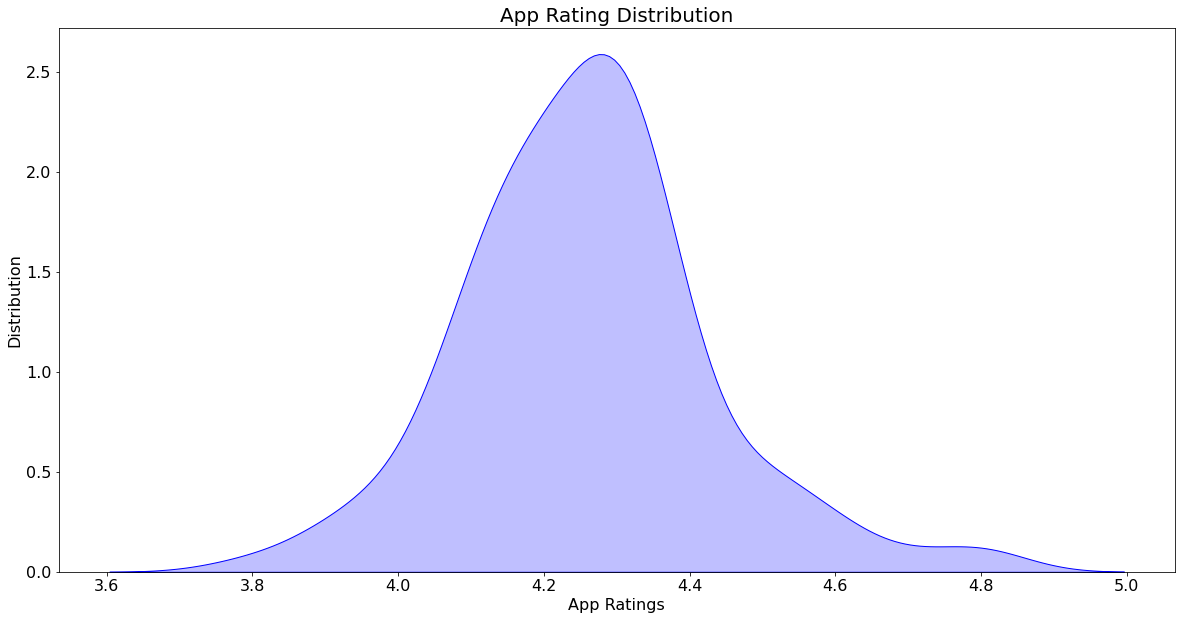

In [66]:
plt.figure(figsize=(20,10))
g = sns.kdeplot(genre_wise_all_installs_ratings.Rating, color="BLUE", shade = True)
g.set_xlabel("App Ratings")
g.set_ylabel("Distribution")
plt.title('App Rating Distribution',size = 20)
plt.show()

# **So we can see Average rating of an application in playstore is around 4.2**

# **Revenue Wise Paid Apps graph**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Revenue Generating Apps Graph')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


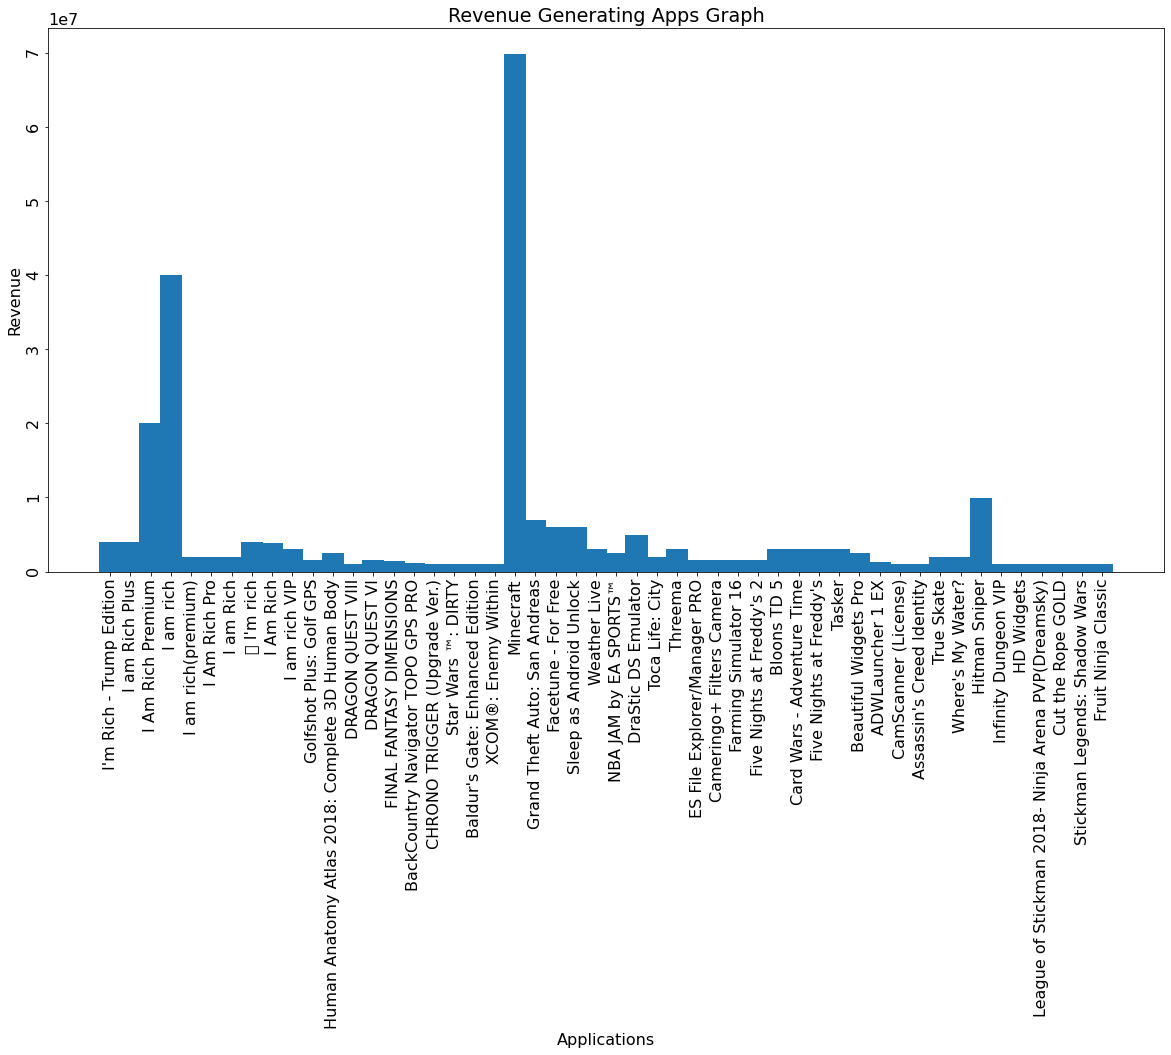

In [67]:
# So Revenue = App Amount to be paid * Numbe of installs
all_paid_apps = df_play_store[df_play_store['Type'] == 'Paid']

rev_df = all_paid_apps[['App', 'Installs', 'Price']]

rev_df['Revenue'] = rev_df['Installs'] * rev_df['Price']

# sorting top 50
earning_df_sort_by_rev = rev_df.sort_values(by='Revenue', ascending=False).head(50)
earning_df_sort_by_price = earning_df_sort_by_rev.sort_values(by='Price', ascending=False)

# plotting the graph
plt.figure(figsize=(20,10))
plt.bar(earning_df_sort_by_price.App, earning_df_sort_by_price.Revenue, width=1.1, label=earning_df_sort_by_price.Revenue)
plt.xlabel("Applications")
plt.ylabel("Revenue")
plt.tick_params(rotation=90)
plt.title("Revenue Generating Apps Graph")

## **So we can see Minecraft is generating Highest Revenue among all**

In [68]:
most_pricey_app= df_play_store['App'][df_play_store.Price==df_play_store['Price'].max()].iloc[0]
print(f'The most pricey app on playstore is\n{most_pricey_app}')

The most pricey app on playstore is
I'm Rich - Trump Edition


## **So we can say The Highest Revenue generating app doesnt mean it have to be the most pricey.**

## **We should compare the App category with the pricing of the category to understand how an app should be priced to be successful for a category or we can also say how a pricing has to be determined for a app to be successful (generate high revenue) on a category**

In [69]:
popular_apps_installwise = applications_category_installs.sort_values(by='Installs', ascending=False)
print(popular_apps_installwise)

                         Installs
Category                         
GAME                 1.396392e+10
COMMUNICATION        1.103928e+10
FAMILY               8.885643e+09
TOOLS                8.102772e+09
PRODUCTIVITY         5.793091e+09
SOCIAL               5.487868e+09
PHOTOGRAPHY          4.649148e+09
VIDEO_PLAYERS        3.931903e+09
TRAVEL_AND_LOCAL     2.894887e+09
NEWS_AND_MAGAZINES   2.369218e+09
ENTERTAINMENT        2.113660e+09
BOOKS_AND_REFERENCE  1.665970e+09
PERSONALIZATION      1.532495e+09
SHOPPING             1.400349e+09
SPORTS               1.296474e+09
HEALTH_AND_FITNESS   1.144023e+09
BUSINESS             6.971649e+08
LIFESTYLE            5.038235e+08
MAPS_AND_NAVIGATION  5.032819e+08
FINANCE              4.553487e+08
WEATHER              3.611005e+08
EDUCATION            3.529520e+08
FOOD_AND_DRINK       2.117988e+08
DATING               1.409261e+08
ART_AND_DESIGN       1.143381e+08
HOUSE_AND_HOME       9.721246e+07
AUTO_AND_VEHICLES    5.313021e+07
LIBRARIES_AND_

Text(0.5, 1.0, 'Category wise App Apps Pricing trends')

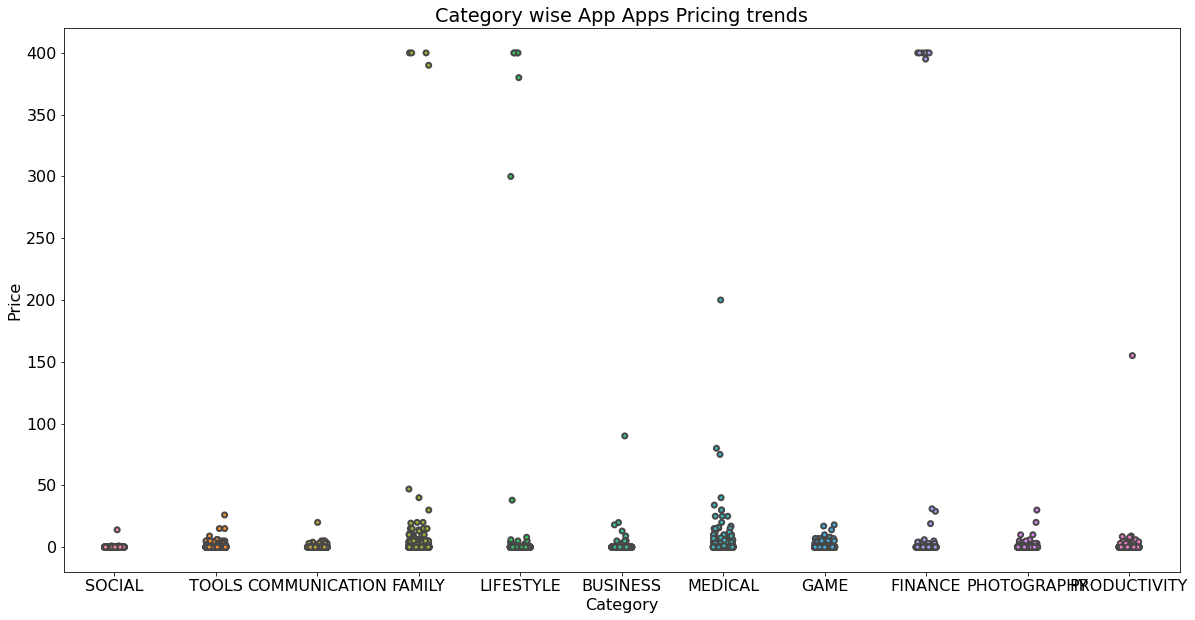

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

# Selecting most installed app categories
popular_app_categories = df_play_store[df_play_store.Category.isin(['GAME', 'COMMUNICATION', 'FAMILY', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL', 'PHOTOGRAPHY', 'MEDICAL', 'FINANCE', 'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x='Category', y='Price', data=popular_app_categories,
                   jitter=True, linewidth=2)
ax.set_title('Category wise App Apps Pricing trends')

# **Top Paid Apps by Price in Playstore**

In [71]:
top_10_paid_apps_by_price = df_play_store[df_play_store['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


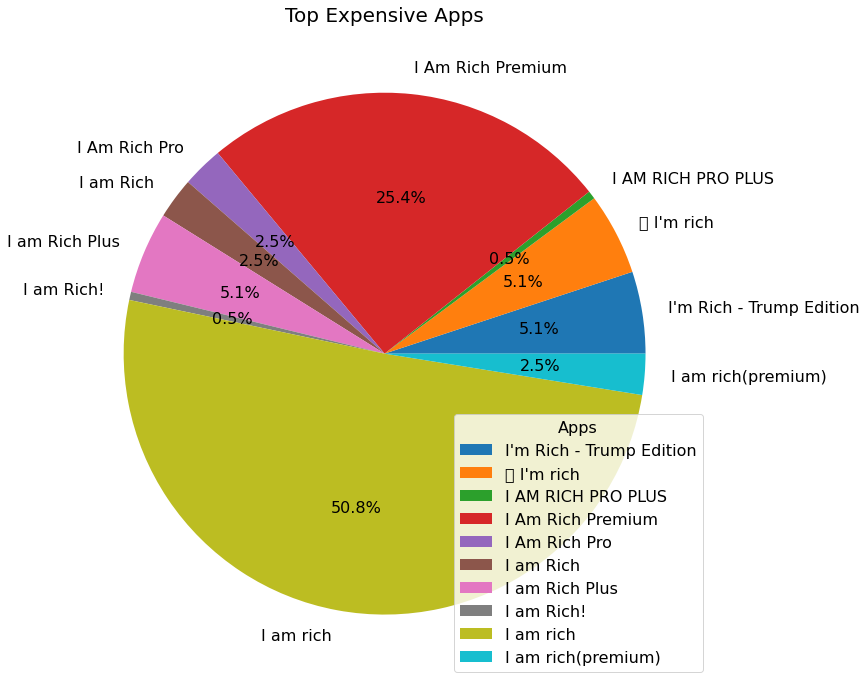

In [72]:
plt.figure(figsize=(15,12));
plt.pie(top_10_paid_apps_by_price.Installs, explode=None, labels=top_10_paid_apps_by_price.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps',size = 20);
plt.legend(top_10_paid_apps_by_price.App, 
           loc="lower right",
           title="Apps",);

## **So we can see from the above graph comparison that "I am rich" and "I am Rich Premium" are the two most Expensive Apps.**

# **Viewing Genre wise App rating**

In [73]:
# we already have the genre wise all applications ratings data
genre_wise_all_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


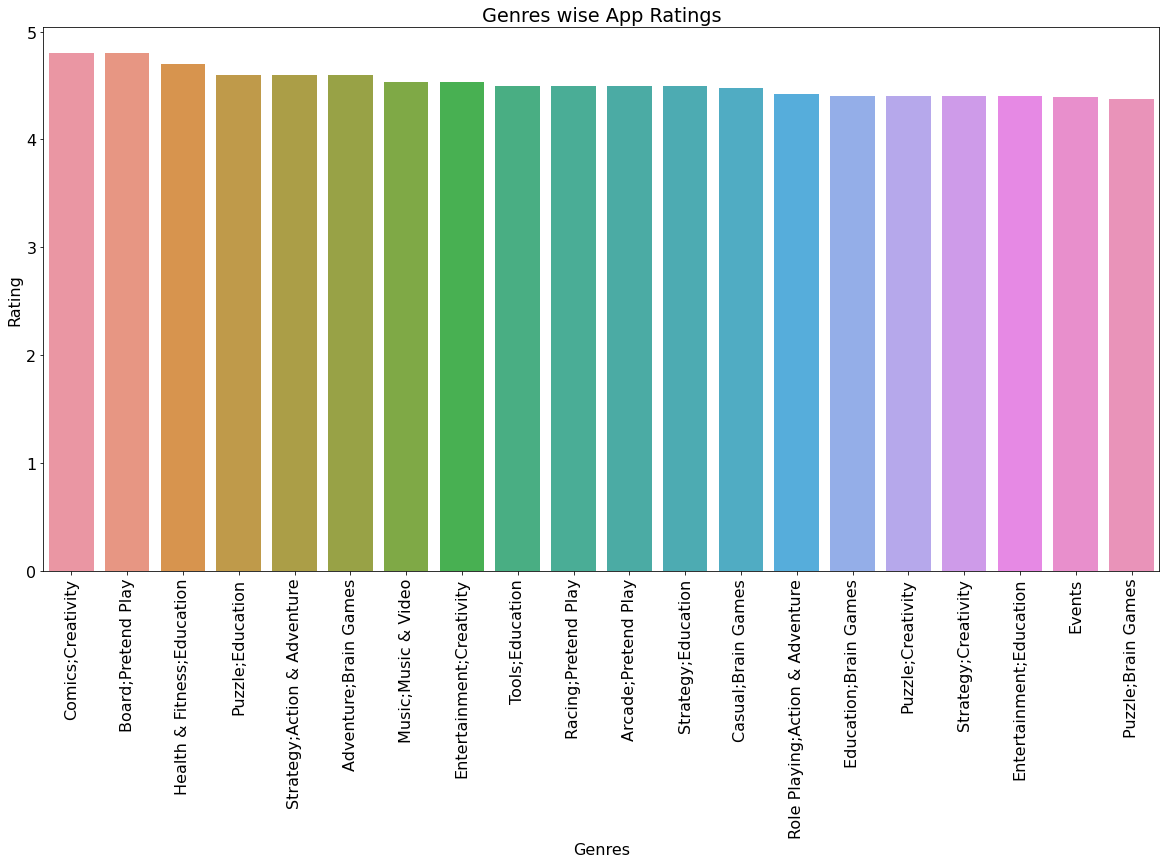

In [74]:
top_20_rated_genres = genre_wise_all_installs_ratings.iloc[0:20]
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel("Genres")
colors = ["red"]
plt.ylabel("Rating")
plt.title("Genres wise App Ratings")
sns.barplot(top_20_rated_genres.Genres, top_20_rated_genres.Rating)
plt.show()

# **Size wise Application distributon over all provided data (playstore)**

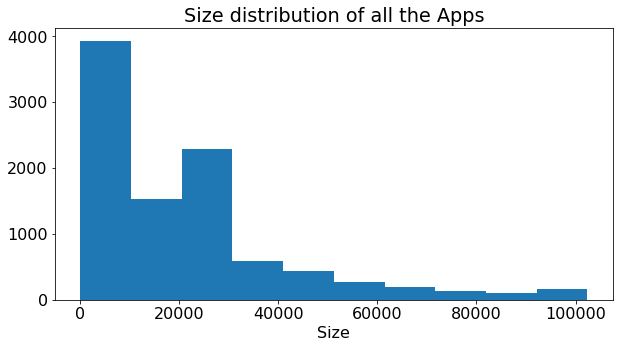

In [75]:
# to remove null values from size column
df_play_store.loc[df_play_store['Size'].isnull(),'Size']=0
plt.xlabel("Size")
plt.title("Size distribution of all the Apps")
plt.hist(df_play_store['Size']);
plt.show()

## **So we can see from the graph that maximum app are in the size category of 10000 KB to 30000 Kb. ie. 10MB to 30 MB**

## **Comparing No of apps Age Group(Content rating) wise**

Text(0.5, 0, 'Content Rating')

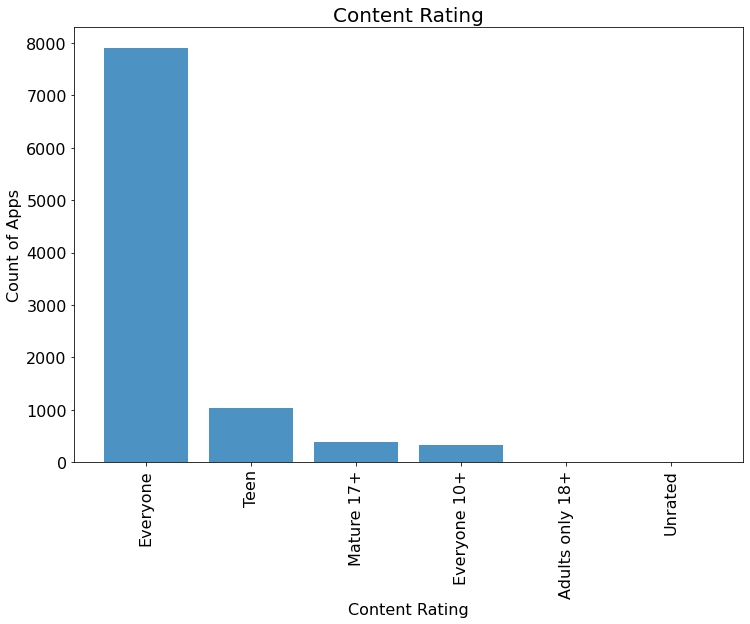

In [76]:
x_data2 = df_play_store['Content Rating'].value_counts().index
y_data2 = df_play_store['Content Rating'].value_counts()

x_data2_axs = []
y_data2_axs = []
for i in range(len(x_data2)):
    x_data2_axs.append(x_data2[i])
    y_data2_axs.append(y_data2[i])
    
# plotting the graph

plt.figure(figsize=(12,8))
plt.bar(x_data2_axs,y_data2_axs, alpha=0.8)
plt.title('Content Rating',size = 20)
plt.xticks(rotation=90)
plt.ylabel('Count of Apps')
plt.xlabel('Content Rating')

## **So we can see from the graph that most of the apps are for everyone (Approx 7900) so that it could capture the most of the customer-base.**

# **Content Rating (Age Group) based Average Rating of the Apps**

Text(0.5, 1.0, 'Content Rating wise Average rating of apps')

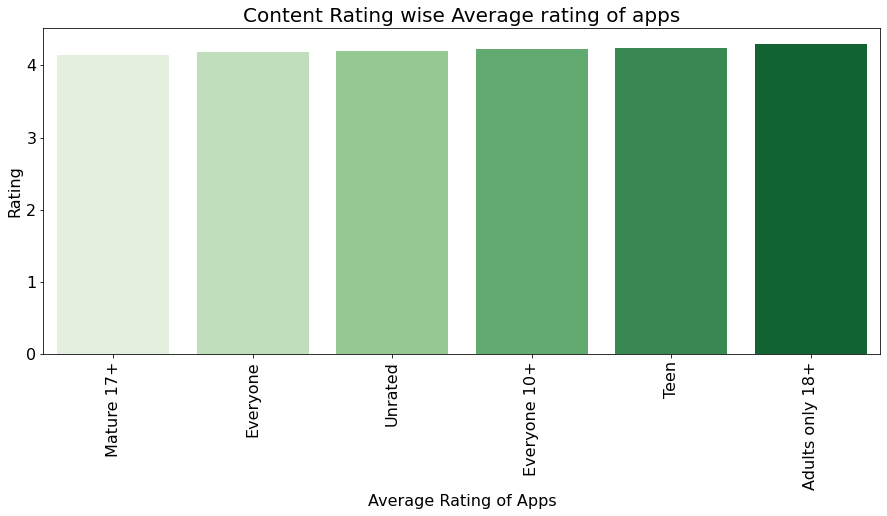

In [77]:
#sorting
avg_rating_per_content_rating = df_play_store.groupby("Content Rating").Rating.mean().reset_index() #avg_rating_per_content_rating
sorted_avg_rating_per_content_rating = avg_rating_per_content_rating.sort_values(by=["Rating"], ascending=True)  #sort by rating in descending order

f, axes = plt.subplots(figsize=(15, 6), sharex=True)

ax = sns.barplot(x="Content Rating", y="Rating", data=sorted_avg_rating_per_content_rating, palette="Greens") 
for item in ax.get_xticklabels():
    item.set_rotation(90) #rotating to view it in a better way
plt.xlabel("Average Rating of Apps")
plt.title("Content Rating wise Average rating of apps", size=20)

## **So from this graph comparison we can see the Apps which have content rating "Adults only 18+" ie. Apps made for adults and above age level 18 have got the Average rating of more than 4**

## **Now Lets analyse the "User Reviews.csv" Data**

**Lets merge the user review data based on Apps**

In [78]:
play_store_data_with_review = df_play_store.merge(df_user_review, on="App")   #df_user_review is the user review data in dataframe

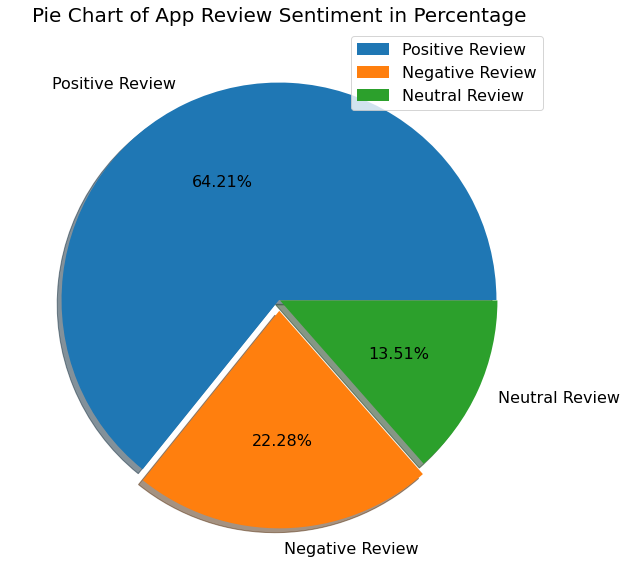

In [79]:
import matplotlib
counts = list(play_store_data_with_review['Sentiment'].value_counts())
labels = 'Positive Review', 'Negative Review', 'Neutral Review'
matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('Pie Chart of App Review Sentiment in Percentage', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

## *So from the above plot we can say that Most of the review sentiments are positive *

# **Conclusion:**

**The target of this Play store Data analysis is to know how different parameters can affect the app ratings and reviews and understand how these can effect the Play store app industry as a whole. So we can conclude that:**


1.   Users mostly prefer the free apps. App size doesnot affect the decision of using the paid or free apps much.
2.   The apps which have the higher rating above 4 those are actually targetting all the people not a certain age group.
3.   Number of Installs and number of reviews are the Most popular category of apps.
4.   Family, Game, Communication, Social, Tools, Medical, Events category Apps have the highest earning.
5.   Also at the same time Medical, Family, Tools, Game category apps are the most expensive apps which actually is clear also because these category of the application market have the most invested money and indeed these are the right categories to make best profits.
6.   Customer ratings actually effect the category to release an app on that category.
7.   We can see that most positive sentiment reviews are from most popular categories.
8.   Positive reviews are higher than negative and neutral sentiment reviews.

